# MSIS 2802 Data Science Analysis with Python
## Data - Countries Of The World

## Content

Information on population, region, area size, infant mortality and more.

## Acknowledgements

Source: All these data sets are made up of data from the US government. Generally they are free to use if you use the data in the US. If you are outside of the US, you may need to contact the US Govt to ask. Data from the World Factbook is public domain. The website says "The World Factbook is in the public domain and may be used freely by anyone at anytime without seeking permission." 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

## Inspiration

When making visualisations related to countries, sometimes it is interesting to group them by attributes such as region, or weigh their importance by population, GDP or other variables.

## Our Dataset has following columns:

<ol>

<li><b>Country</b>: Country of the world.</li>
<li><b>Region</b>: The geographic regions of the world can be divided into: Africa, Asia, Central America, Eastern Europe, European Union, Middle East, North America, Oceania, South America, and the Caribbean.</li>
<li><b>Population</b>: Population of a country.</li>
<li><b>Area</b>: Area of the country in (sq. mi.)</li>
<li><b>Pop. Density (per sq. mi.)</b>: Population Density per square miles.</li>
<li><b>Coastline (coast/area ratio)</b>:  The length of coastline in each country.</li>
<li><b>Net migration</b>: The net total of migrants during the period, that is, the total number of immigrants less the annual number of emigrants, including both citizens and noncitizens.</li>
<li><b>Infant mortality (per 1000 births)</b>: The number of deaths of infants under one year old in a given year per 1,000 live births in the same year.</li>
<li><b>GDP ($ per capita)</b>: The Gross Domestic Product measures the value of economic activity within a country. It is the sum of the market values, or prices, of all final goods and services produced in an economy during a period of time.</li>
<li><b>Literacy (%)</b>: Literacy is a key skill and a key measure of a population’s education.</li>
<li><b>Phones (per 1000)</b>: Number of phones used per 1000</li>
<li><b>Arable (%)</b>: The land capable of being ploughed and used to grow crops.</li>
<li><b>Crops (%)</b>: A crop is a plant or plant product that can be grown and harvested for profit or subsistence.</li>
<li><b>Other (%)</b>:</li>
<li><b>Climate</b>:</li>
<li><b>Birthrate</b>: Birth rate compares the average annual number of births during a year per 1,000 persons in the population at midyear; also known as crude birth rate</li>
<li><b>Deathrate</b>: Death rate compares the average annual number of deaths during a year per 1,000.</li>
<li><b>Agriculture</b>: Agriculture is the science and art of cultivating plants and livestock.</li>
<li><b>Industry</b>: An industry is the production of goods or related services within an economy.</li>
<li><b>Service</b>:</li>

In [766]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats as sts
from sklearn import linear_model
from sklearn import datasets
import plotly.plotly as py
import plotly.graph_objs as ply
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from sklearn.linear_model import LinearRegression

## Importing datasets for countries of the world. 

In [781]:
world_data = pd.read_csv('countries_of_the_world.csv')

In [783]:
world_data.info()
world_data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null object
Coastline (coast/area ratio)          227 non-null object
Net migration                         224 non-null object
Infant mortality (per 1000 births)    224 non-null object
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null object
Phones (per 1000)                     223 non-null object
Arable (%)                            225 non-null object
Crops (%)                             225 non-null object
Other (%)                             225 non-null object
Climate                               205 non-null object
Birthrate                 

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)             object
Coastline (coast/area ratio)           object
Net migration                          object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Literacy (%)                           object
Phones (per 1000)                      object
Arable (%)                             object
Crops (%)                              object
Other (%)                              object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
Industry                               object
Service                                object
dtype: object

In [784]:
world_data.shape

(227, 20)

### The original dataset looks like:

In [785]:
world_data.head(5)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Data cleaning

In [786]:
world_data.columns = (['Country', 'Region', 'Population', 'Area', 'Pop_Density', 'Coastline', 'Net_Migration',\
              'Infant_Mortality', 'GDP', 'Literacy', 'Phones', 'Arable', 'Crops', 'Other', 'Climate', 'Birthrate',\
              'Deathrate', 'Agriculture', 'Industry', 'Service'])

In [787]:
world_data.Literacy = world_data.Literacy.str.replace(",",".").astype(float)
world_data.Pop_Density = world_data.Pop_Density.str.replace(",",".").astype(float)
world_data.Coastline = world_data.Coastline.str.replace(",",".").astype(float)
world_data.Net_Migration = world_data.Net_Migration.str.replace(",",".").astype(float)
world_data.Infant_Mortality = world_data.Infant_Mortality.str.replace(",",".").astype(float)
world_data.Phones = world_data.Phones.str.replace(",",".").astype(float)
world_data.Arable = world_data.Arable.str.replace(",",".").astype(float)
world_data.Crops = world_data.Crops.str.replace(",",".").astype(float)
world_data.Birthrate = world_data.Birthrate.str.replace(",",".").astype(float)
world_data.Deathrate = world_data.Deathrate.str.replace(",",".").astype(float)
world_data.Agriculture = world_data.Agriculture.str.replace(",",".").astype(float)
world_data.Industry = world_data.Industry.str.replace(",",".").astype(float)
world_data.Service = world_data.Service.str.replace(",",".").astype(float)
world_data.Other = world_data.Other.str.replace(",",".").astype(float)
world_data.Climate = world_data.Climate.str.replace(",",".").astype(float)

In [791]:
world_data.Country = world_data.Country.astype('category')
world_data.Region = world_data.Region.astype('category')
world_data.head()

,Country,Region,Population,Area,Pop_Density,Coastline,Net_Migration,Infant_Mortality,GDP,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [776]:
df.dtypes

Country              object
Region               object
Population            int64
Area                  int64
Pop_Density         float64
Coastline           float64
Net_Migration       float64
Infant_Mortality    float64
GDP                 float64
Literacy            float64
Phones              float64
Arable              float64
Crops               float64
Other               float64
Climate             float64
Birthrate           float64
Deathrate           float64
Agriculture         float64
Industry            float64
Service             float64
dtype: object

In [777]:
df = df.dropna()

## Section I: An Analysis of Literacies and Other Variables


### Below shows the GDP of the top 10 countries with highest literacy

In [797]:
# create a pie chart to show GDP of Top 10 countries with highest literacy
lit = world_data.sort_values("Literacy", ascending=False).head(10)
fig = {
  "data": [
    {
      "values": lit.GDP,
      "labels": lit.Country,
      "domain": {"x": [0, .5]},
      "name": "GDP percentage of",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"GDP of top 10 country(literacy)",
        "annotations": [
            { "font": { "size": 15},
              "showarrow": False,
              "text": "GDP",
                "x": 0.22,
                "y": 0.5
            },
        ]
    }
}
iplot(fig)

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning:

invalid value encountered in greater

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning:

invalid value encountered in less



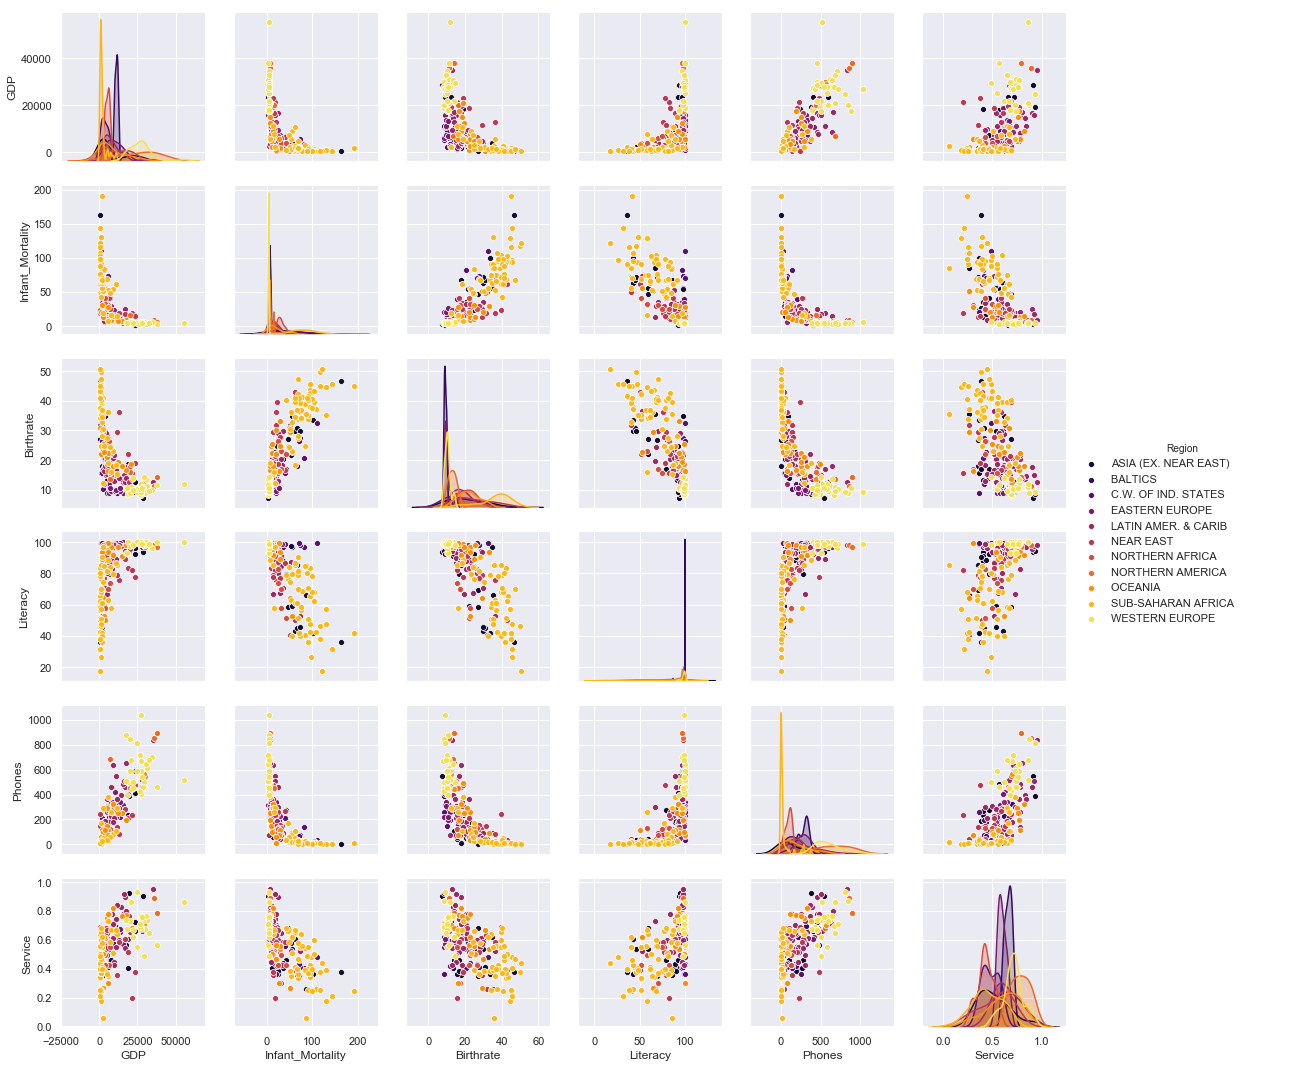

In [798]:
# create pairplot to show relationships between variables
x = world_data.loc[:,["Region","GDP","Infant_Mortality","Birthrate","Literacy",'Phones',"Service"]]
sns.pairplot(x,hue="Region",palette="inferno")

### GDP is the key. 
### As you see, there are positive correlation between "Phones" and "Service". Let's look these two features deeply

## Relationship Between Variables and Birthrate

### A country with high birth rate would want to know what is directly and inversely related to it.

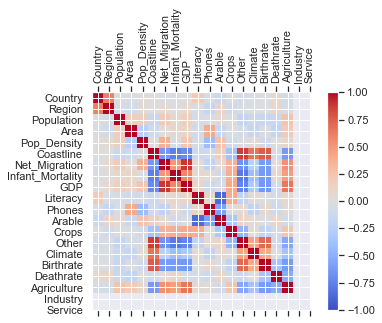

In [746]:
# a plot to visualize the correlation between variables
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

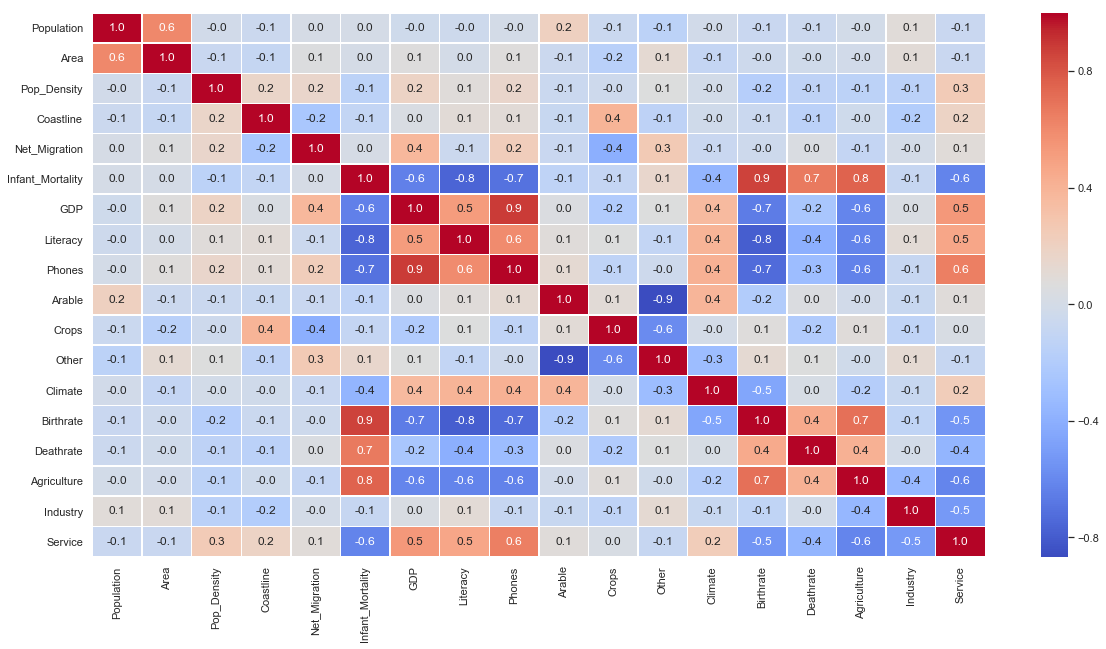

In [747]:
# a more specific visualization of the relationship/correlation between variables
f, ax = plt.subplots(figsize = (20,10))
sns.heatmap(df.corr(), annot = True, linewidth = 0.5, fmt = ".1f", ax=ax, cmap='coolwarm')
plt.show()

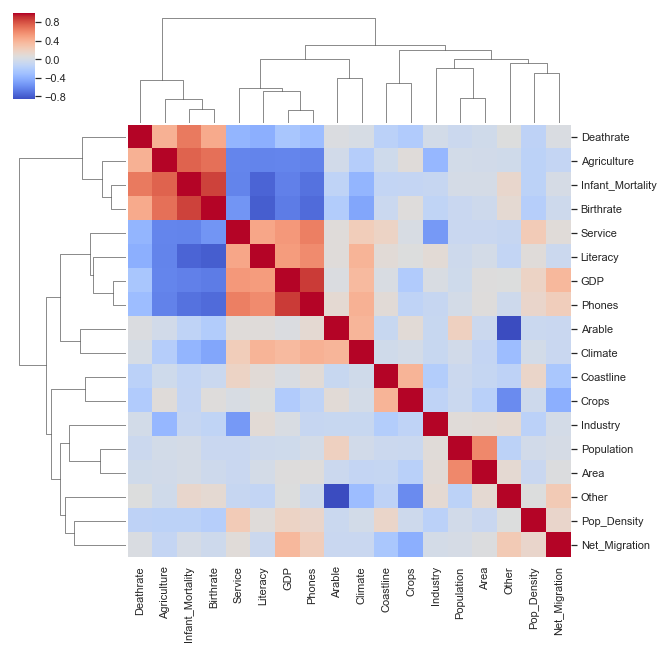

In [749]:
sns.clustermap(df.corr(), cmap = 'coolwarm')

In [750]:
# create a series that lists correlations between birthrate and all variables
birth = df.corr().Birthrate.drop('Birthrate')

From the graphs and series created above, we can see a strong direct correlation between birthrate, and infant mortality and agriculture, as well as a strong inverse correlation between birthrate, and GDP, literacy, and phones. To narrow down the list, we want to find the variables that are significantly correlated with birthrate. 

Below, we will calculate the z-scores, and then the p-values, to find the correlations that are most significant, using a threshold of p < 0.05.

In [754]:
# calculate z-scores of the correlation of birth with all other variables
z_scores = stats.zscore(birth)

In [755]:
# using the z-scores found above to calculate p-values
p_value = sts.norm.sf(abs(z_scores))
p_value = pd.Series(p_value).reset_index()

In [756]:
birth = birth.reset_index()

In [757]:
# merging dataframe with p-value
pd.merge(birth, p_value, right_index=True, left_index=True).drop(columns=['index_y', 'Birthrate']).\
            rename(columns={"index_x": "Variables", 0: "P_Value"}).nsmallest(3, 'P_Value')

,Variables,P_Value
5,Infant_Mortality,0.017031
14,Agriculture,0.038351
7,Literacy,0.063615


After calculating the z-scores and p-values, we found that the only infant mortality and agriculture are significantly correlated with birthrate.

We want to find out now which countries have the highest birth rate.

### Observation Thus Far

We have found that infant mortality and agriculture are significantly positively correlated with birthrate. We speculate that this relationship exist because infant mortality and agriculture are inversely correlated with GDP. To illustrate this further, we have created several plots to visualize the relationship between GDP, infant mortality, and agriculture.

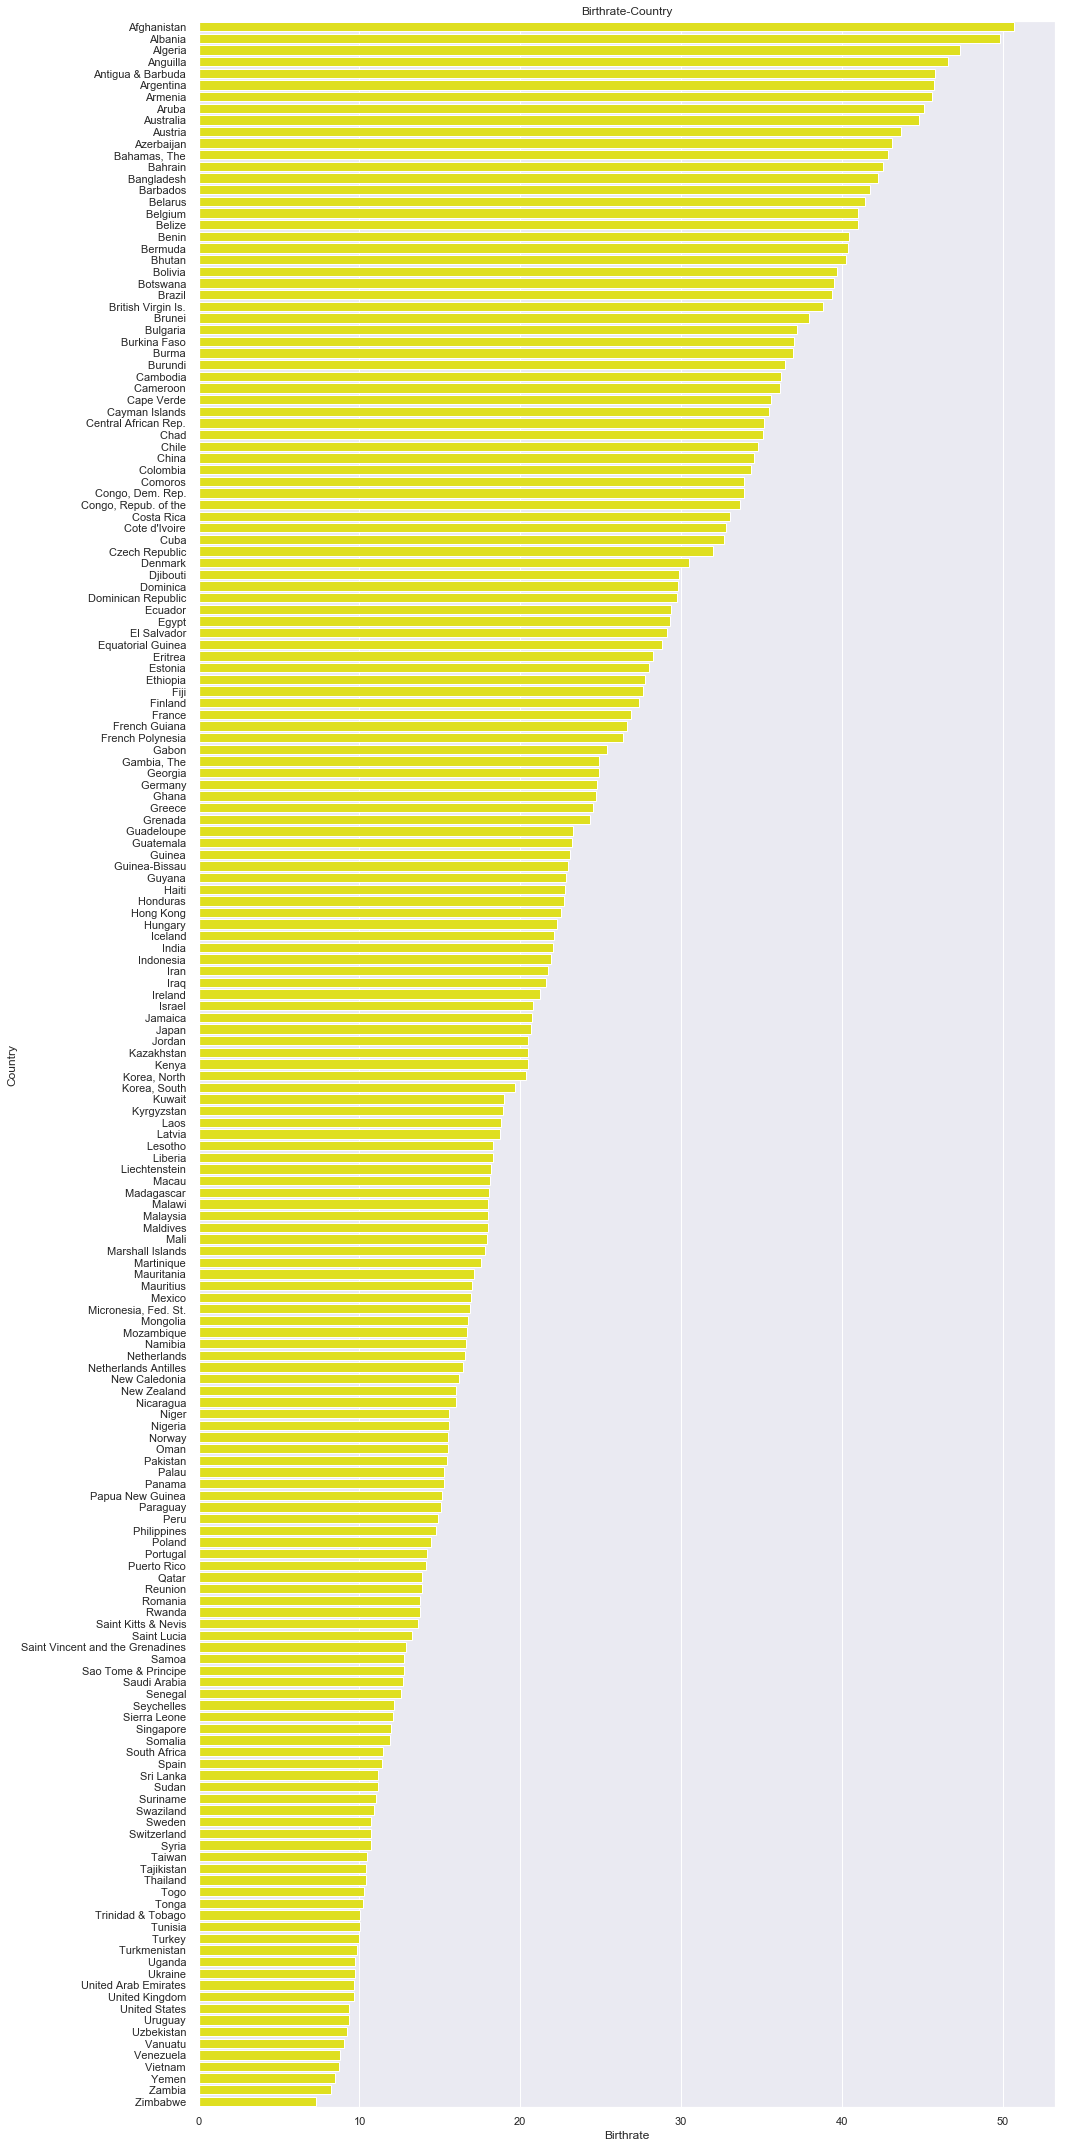

In [758]:
# create barplot to show relationship between countries and birthrate
plt.figure(figsize=(15,30))
sns.set()
sns.barplot(x=df["Birthrate"].sort_values(ascending = False),y=df["Country"].unique(), color = 'yellow')
plt.xlabel("Birthrate")
plt.ylabel("Country")
plt.title("Birthrate-Country")
plt.tight_layout()
plt.show()

In [759]:
# show relationship between region and birthrate
reg = df.groupby("Region")
reg["Birthrate"].sum()

Region
ASIA (EX. NEAR EAST)                    534.45
BALTICS                                  19.28
C.W. OF IND. STATES                     188.62
EASTERN EUROPE                           64.05
LATIN AMER. & CARIB                     805.26
NEAR EAST                               298.31
NORTHERN AFRICA                          55.60
NORTHERN AMERICA                         25.54
OCEANIA                                 252.88
SUB-SAHARAN AFRICA                     1702.34
WESTERN EUROPE                          182.75
Name: Birthrate, dtype: float64

Text(0, 0.5, 'Infant_Mortality')

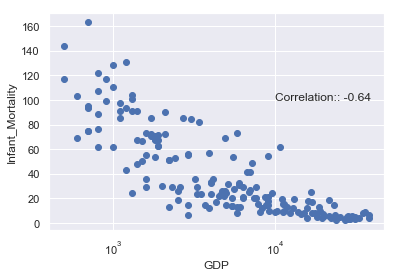

In [760]:
# create scatterplot to show relationship between GDP and infant mortality
x = df['GDP'].values
y = df['Infant_Mortality'].values
m = corr.loc['GDP', 'Infant_Mortality']
plt.scatter(x, y)
plt.text(10**4, 100, '%s: %s' %('Correlation:', np.round(m, 2)))
plt.xscale('log')
plt.xlabel('GDP')
plt.ylabel('Infant_Mortality')

In [763]:
df.sort_values('Infant_Mortality', ascending = False)

,Country,Region,Population,Area,Pop_Density,Coastline,Net_Migration,Infant_Mortality,GDP,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
183,Sierra Leone,SUB-SAHARAN AFRICA,6005250,71740,83.7,0.56,0.00,143.64,500.0,31.4,4.0,6.98,0.89,92.13,2.0,45.76,23.03,0.490,0.310,0.210
142,Mozambique,SUB-SAHARAN AFRICA,19686505,801590,24.6,0.31,0.00,130.79,1200.0,47.8,3.5,5.10,0.30,94.60,2.0,35.18,21.35,0.262,0.348,0.390
117,Liberia,SUB-SAHARAN AFRICA,3042004,111370,27.3,0.52,0.00,128.87,1000.0,57.5,2.3,3.95,2.28,93.77,2.0,44.77,23.10,0.769,0.054,0.177
151,Niger,SUB-SAHARAN AFRICA,12525094,1267000,9.9,0.00,-0.67,121.69,800.0,17.6,1.9,3.54,0.01,96.45,1.0,50.73,20.91,0.390,0.170,0.440
128,Mali,SUB-SAHARAN AFRICA,11716829,1240000,9.5,0.00,-0.33,116.79,900.0,46.4,6.4,3.82,0.03,96.15,2.0,49.82,16.89,0.450,0.170,0.380
188,Somalia,SUB-SAHARAN AFRICA,8863338,637657,13.9,0.47,5.37,116.70,500.0,37.8,11.3,1.67,0.04,98.29,1.0,45.13,16.63,0.650,0.100,0.250
199,Tajikistan,C.W. OF IND. STATES,7320815,143100,51.2,0.00,-2.86,110.76,1000.0,99.4,33.5,6.61,0.92,92.47,2.0,32.65,8.25,0.234,0.286,0.480
87,Guinea-Bissau,SUB-SAHARAN AFRICA,1442029,36120,39.9,0.97,-1.57,107.17,800.0,42.4,7.4,10.67,8.82,80.51,2.0,37.22,16.53,0.620,0.120,0.260
55,Djibouti,SUB-SAHARAN AFRICA,486530,23000,21.2,1.37,0.00,104.13,1300.0,67.9,22.8,0.04,0.00,99.96,1.0,39.53,19.31,0.179,0.225,0.596


Text(0, 0.5, 'Agriculture')

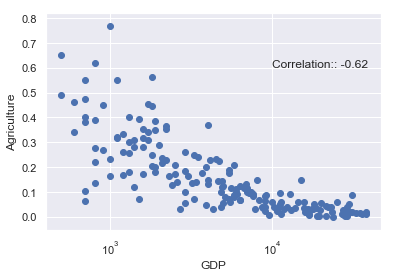

In [761]:
# create scatterplot to show relationship between GDP and agriculture
x = df['GDP'].values
y = df['Agriculture'].values
m = corr.loc['GDP', 'Agriculture']
plt.scatter(x, y)
plt.text(10**4, 0.6, '%s: %s' %('Correlation:', np.round(m, 2)))
plt.xscale('log')
plt.xlabel('GDP')
plt.ylabel('Agriculture')

The graphs above shows that there are indeed relationship between GDP and agriculture and infant mortality, and their relationships are inversely correlated. Meaning that if GDP increases, agriculture and infant mortality decrease.

## Conclusion for Part II

1. We initially found that infant mortality and agriculture are significantly positively correlated with birthrate. To explain this relationship, we speculate infant mortality and agriculture are inversely correlated with GDP per capita.


2. We found that Sub-Saharan Africa region has the highest birthrate, and 8 out of 10 of the countries with highest infant mortality rates are in Sub-Saharan Africa.


3. GDP per capita can explain the positive correlation between infant mortality and birhrate because a country with low GDP could potentially have difficulty providing the right environment and healthcare for the newborns to survive. However, we did not have the proper data to conduct an accurate analysis of that. From our analysis, we can only conclude that birthrate and infant mortality are directly correlated, and infant mortality and GDP are inversely correlated.


4. GDP per capita also explains the positive correlation between agriculture and birthrate because we think that a country with low GDP is more likely to be invested in the agriculture domain instead of the industry domain and service domain. We think that it could also be that a country has low GDP per capita because they are in the agriculture domain and not industry nor service domain. Since agriculture is inversely correlated with GDP, we speculate that it could be one of the explanations for the positive relationship between agriculture and birthrate. This is again an opinion of our group and not a causation analysis since we did not use appropriate data and methods for the analysis.